In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [10]:
df['Дата'] = pd.to_datetime(df['Дата'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [13]:
date_sales = df.groupby('Дата')['Количество'].sum().reset_index(name = "Количество продаж").sort_values('Дата')

Вывести несколько первых строк сгруппированных данных

In [16]:
date_sales.head(10)

,Дата,Количество продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
5,2018-01-10,3653
6,2018-01-11,3176
7,2018-01-12,3092
8,2018-01-13,3294
9,2018-01-14,3228


Нарисуйте график продаж у `grouped_df`

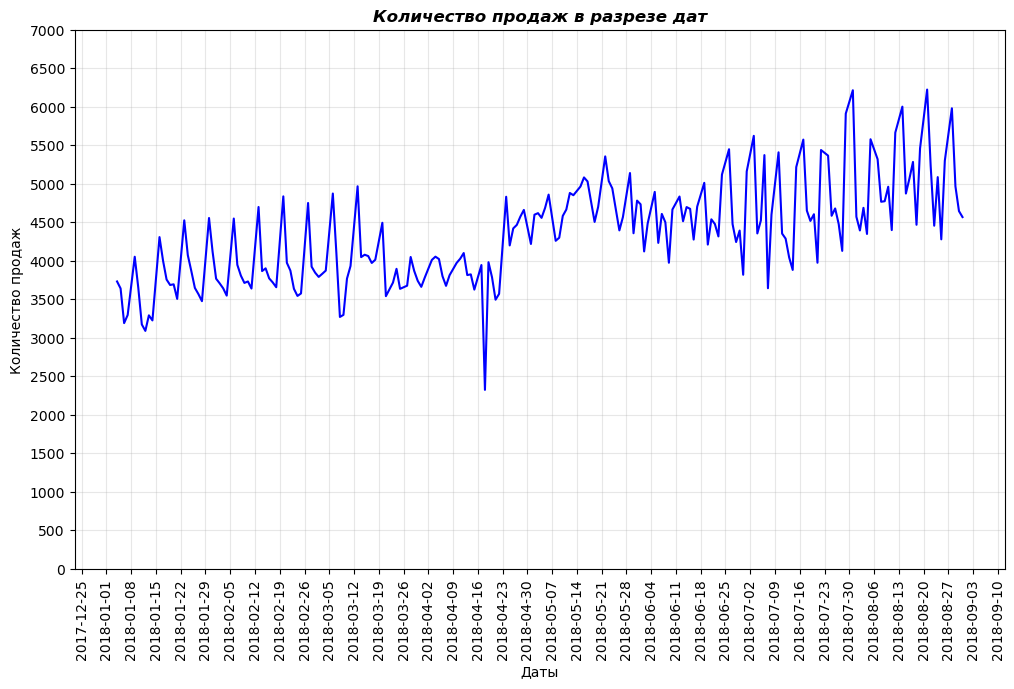

In [21]:
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots(figsize = (12, 7))

ax.plot(date_sales['Дата'], date_sales['Количество продаж'], ls = "-", lw = 1.5, c = "b")
ax.grid(alpha = 0.3)
ax.set_xlabel("Даты")
ax.set_ylabel("Количество продаж")
ax.set_title("Количество продаж в разрезе дат", fontweight = 'bold', fontsize = 12, fontstyle = 'italic')
ax.set_ylim([0, 7000])
ax.set_yticks(np.arange(0, 7500, 500))
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
ax.tick_params(axis = 'x', labelrotation = 90)

plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [23]:
print('''
По графику видно, что в общем есть позитивный тренд количества продаж с течением времени. В течение месяца, примерно с середины марта 2018 по середины 
апреля 2018, наблюдается спад в продажах, с минимальным количество продаж приходящейся на 17-19 числа апреля 2018. Помимо этого, видно что количество
продаж варьируется в течение недели, где пики и спады повторяются примерно с недельной периодичностью. Если смотреть по дням недели, пиковые продажи
больше приходятся на начало недели (понедельник-вторник), а спады - на конец недели. Однако, этот тренд не совсем повторяется в период уменьшения
количества продаж (с середины марта 2018 по середины апреля 2018), и снова стабилизируется примерно начиная с 21 мая 2018. Стоит также заметить, что
после периода уменьшения количества продаж, разница в количестве продаж между пиковыми и минимальными днями в течение недели увеличенная. Возможно, в
период уменьшения продаж что-то произошло что позволило продавать больше и в начале и в конце недели, что увеличило количество продаж в пиковые
и минимальные дни в течение недели (а также разницу между ними).
''')


По графику видно, что в общем есть позитивный тренд количества продаж с течением времени. В течение месяца, примерно с середины марта 2018 по середины 
апреля 2018, наблюдается спад в продажах, с минимальным количество продаж приходящейся на 17-19 числа апреля 2018. Помимо этого, видно что количество
продаж варьируется в течение недели, где пики и спады повторяются примерно с недельной периодичностью. Если смотреть по дням недели, пиковые продажи
больше приходятся на начало недели (понедельник-вторник), а спады - на конец недели. Однако, этот тренд не совсем повторяется в период уменьшения
количества продаж (с середины марта 2018 по середины апреля 2018), и снова стабилизируется примерно начиная с 21 мая 2018. Стоит также заметить, что
после периода уменьшения количества продаж, разница в количестве продаж между пиковыми и минимальными днями в течение недели увеличенная. Возможно, в
период уменьшения продаж что-то произошло что позволило продавать больше и в начале и в конце недели, ч

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [165]:
uq = np.percentile(df['Количество'], 75)
lq = np.percentile(df['Количество'], 25)
IQR = uq - lq
ul = uq + 1.5 * IQR
ll = lq - 1.5 * IQR

max_outlier = df.loc[[df['Количество'].idxmax()]] if (df['Количество'].max() - ul) > (ll - df['Количество'].min()) else df.loc[[df['Количество'].idxmin()]]

max_outlier

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [163]:
df_warehouse_3 = df[df['Склад'] == 3].copy()
df_warehouse_3['День недели'] = df_warehouse_3['Дата'].dt.day_name()
df_warehouse_3['Месяц'] = df_warehouse_3['Дата'].dt.month_name()
df_warehouse_3_grouped = df_warehouse_3.groupby(['Месяц', 'День недели', 'Номенклатура'])['Количество'].sum().reset_index()

df_warehouse_3_top_product = df_warehouse_3_grouped[df_warehouse_3_grouped["День недели"] == "Wednesday"].groupby("Месяц", as_index = False).apply(lambda g: g.loc[g["Количество"].idxmax()], include_groups = False)
df_warehouse_3_top_product[(df_warehouse_3_top_product['Месяц'] == 'June') | (df_warehouse_3_top_product['Месяц'] == 'July') | (df_warehouse_3_top_product['Месяц'] == 'August')]
# Топовый товар по продажам по средам за июнь, июль, август у 3 склада = product_1

,Месяц,День недели,Номенклатура,Количество
1,August,Wednesday,product_1,955
4,July,Wednesday,product_1,696
5,June,Wednesday,product_1,616


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [244]:
# Только погода за 2018 год
weather = pd.read_excel("weather.xlsx")[['Local time in Astana', 'T']]
weather.columns = ['Время', 'Температура_Цельсий']
weather['Время'] = pd.to_datetime(weather['Время'], dayfirst = True)
weather['Дата'] = pd.to_datetime(weather['Время'].dt.date)

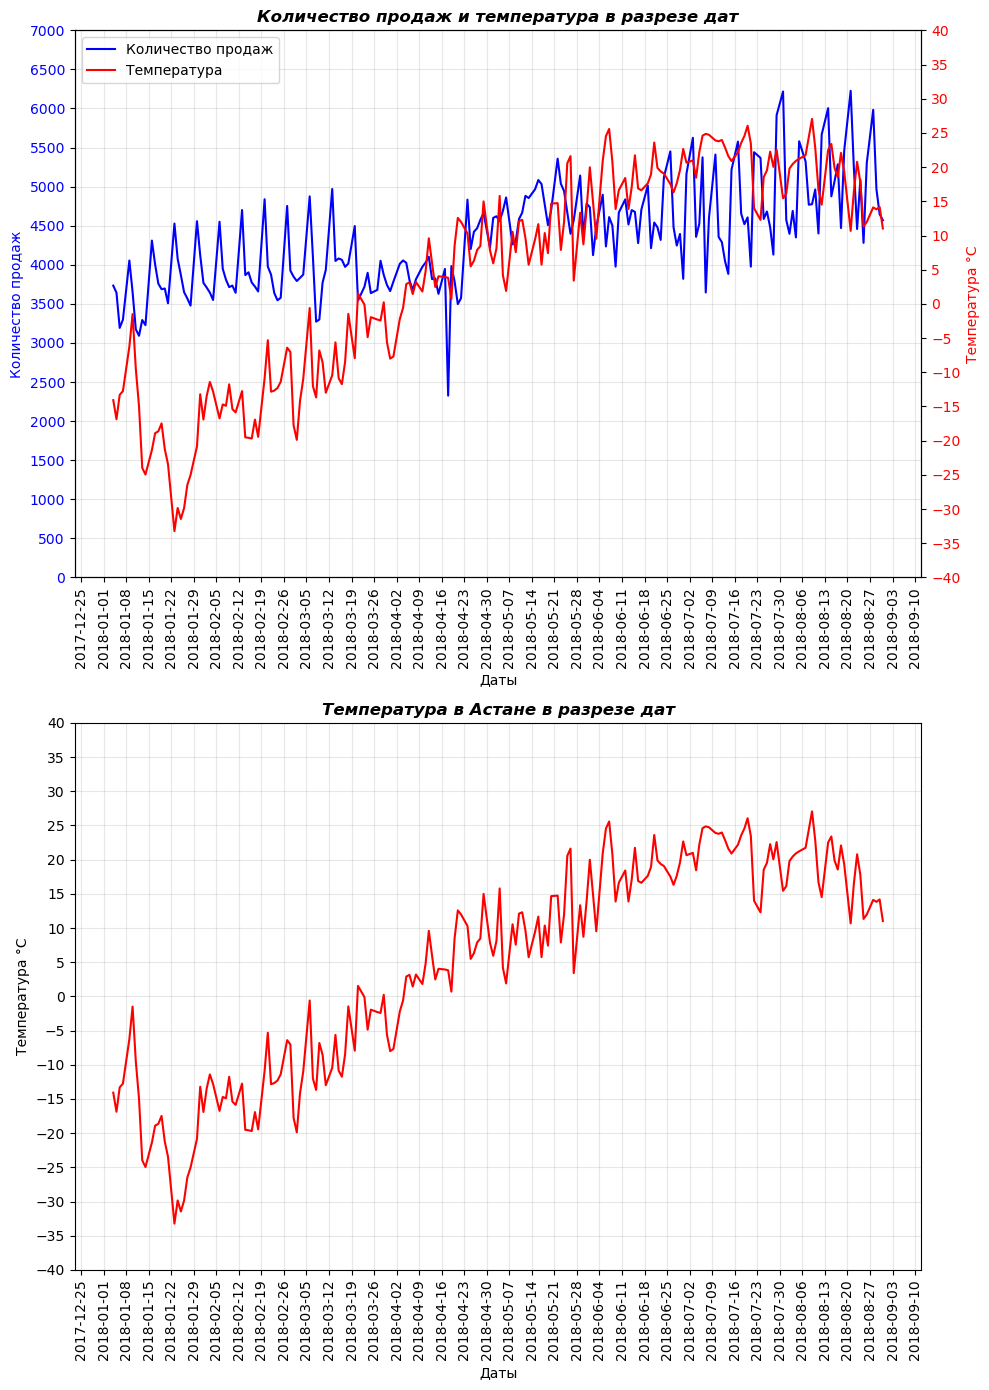

In [346]:
weather_grouped = weather.groupby('Дата').mean()['Температура_Цельсий'].reset_index()
df_merged = pd.merge(weather_grouped, date_sales, on = 'Дата', how = 'inner')

fig, ax = plt.subplots(2, 1, figsize = (10, 14))

sales, = ax[0].plot(df_merged['Дата'], df_merged['Количество продаж'], ls = "-", lw = 1.5, c = "b", label = 'Количество продаж')
ax[0].grid(alpha = 0.3)
ax[0].set_xlabel("Даты")
ax[0].set_ylabel("Количество продаж", color = 'b')
ax[0].set_title("Количество продаж и температура в разрезе дат", fontweight = 'bold', fontsize = 12, fontstyle = 'italic')
ax[0].set_ylim([0, 7000])
ax[0].set_yticks(np.arange(0, 7500, 500))
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval = 7))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[0].tick_params(axis = 'x', labelrotation = 90)
ax[0].tick_params(axis = 'y', labelcolor = 'b')

ax1 = ax[0].twinx()
temp, = ax1.plot(df_merged['Дата'], df_merged['Температура_Цельсий'], ls = "-", lw = 1.5, c = "r", label = 'Температура')
ax1.set_ylabel('Температура °C', color = 'r')
ax1.set_ylim([-30, 40])
ax1.set_yticks(np.arange(-40, 45, 5))
ax1.tick_params(axis = 'y', labelcolor = 'r')

ax[0].legend(handles = [sales, temp], loc = 'upper left')

ax[1].plot(df_merged['Дата'], df_merged['Температура_Цельсий'], ls = "-", lw = 1.5, c = "r", label = 'Температура')
ax[1].grid(alpha = 0.3)
ax[1].set_xlabel("Даты")
ax[1].set_ylabel("Температура °C")
ax[1].set_title("Температура в Астане в разрезе дат", fontweight = 'bold', fontsize = 12, fontstyle = 'italic')
ax[1].set_ylim([-30, 40])
ax[1].set_yticks(np.arange(-40, 45, 5))
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval = 7))
ax[1].tick_params(axis = 'x', labelrotation = 90)

plt.tight_layout()
plt.show()

In [350]:
print('''
Как видно, с повышение температуры, после переходного межсезонья, количество продаж слегка увеличилось.
''')


Как видно, с повышение температуры, после переходного межсезонья, количество продаж слегка увеличилось.

